In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.special import erfc

In [7]:
df = pd.read_csv('../docs 2nd Approach/relative_error.csv')
df = df.apply(lambda x: x.sort_values().values)
df

,0.5v,3v,6v,9v,12v,15v,18v,21v,24.5v
0,-24.0,-2.0,-1.333333,-0.666667,-0.666667,-0.866667,-0.333333,-0.190476,-0.204082
1,-24.0,-2.0,-1.333333,-0.666667,-0.666667,-0.733333,-0.222222,-0.190476,-0.204082
2,-24.0,-2.0,-1.000000,-0.666667,-0.666667,-0.533333,-0.222222,-0.190476,-0.204082
3,-18.0,-1.0,-1.000000,-0.666667,-0.500000,-0.533333,-0.222222,-0.190476,-0.204082
4,-14.0,-1.0,-1.000000,-0.666667,-0.500000,-0.400000,-0.222222,-0.190476,-0.122449
...,...,...,...,...,...,...,...,...,...
995,16.0,2.0,0.666667,0.666667,0.333333,0.266667,0.333333,0.285714,0.285714
996,16.0,2.0,1.000000,0.666667,0.333333,0.266667,0.333333,0.285714,0.285714
997,16.0,2.0,1.000000,0.666667,0.500000,0.266667,0.333333,0.428571,0.285714
998,16.0,2.0,1.000000,0.666667,0.500000,0.400000,0.333333,0.428571,0.285714


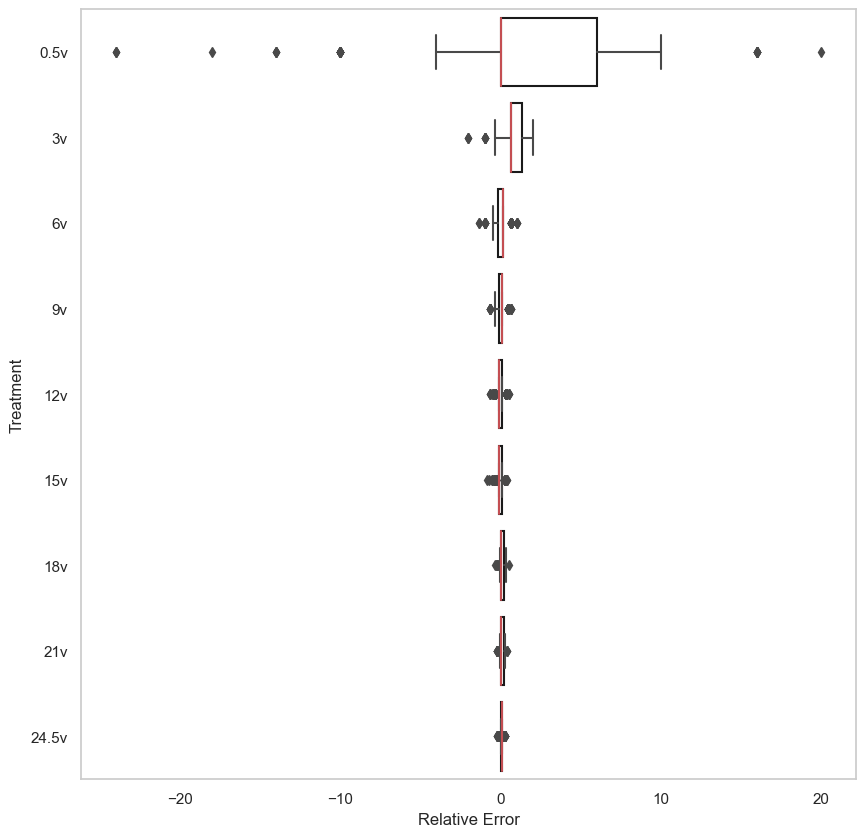

In [8]:
list_voltage = []
for i in df.columns:
    list_voltage.append(str(i))

df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=list_voltage)
df_melt.columns = ['index', 'voltage', 'value']

sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid', {'axes.grid' : False})
ax = sns.boxplot(
    x='value', 
    y='voltage', 
    data=df_melt, 
    boxprops = {"edgecolor":'k', 'facecolor':'w'},
    medianprops={"color": "r"},)
ax.set(xlabel='Relative Error', ylabel='Treatment')
plt.savefig('../docs 2nd Approach/img/Boxplot relative error.png')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x26c15a629b0>,
 'caps': [<matplotlib.lines.Line2D at 0x26c15a62978>,
 'boxes': [<matplotlib.patches.PathPatch at 0x26c15a72a90>],
 'medians': [<matplotlib.lines.Line2D at 0x26c15a817b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x26c15a81a90>],
 'means': []}

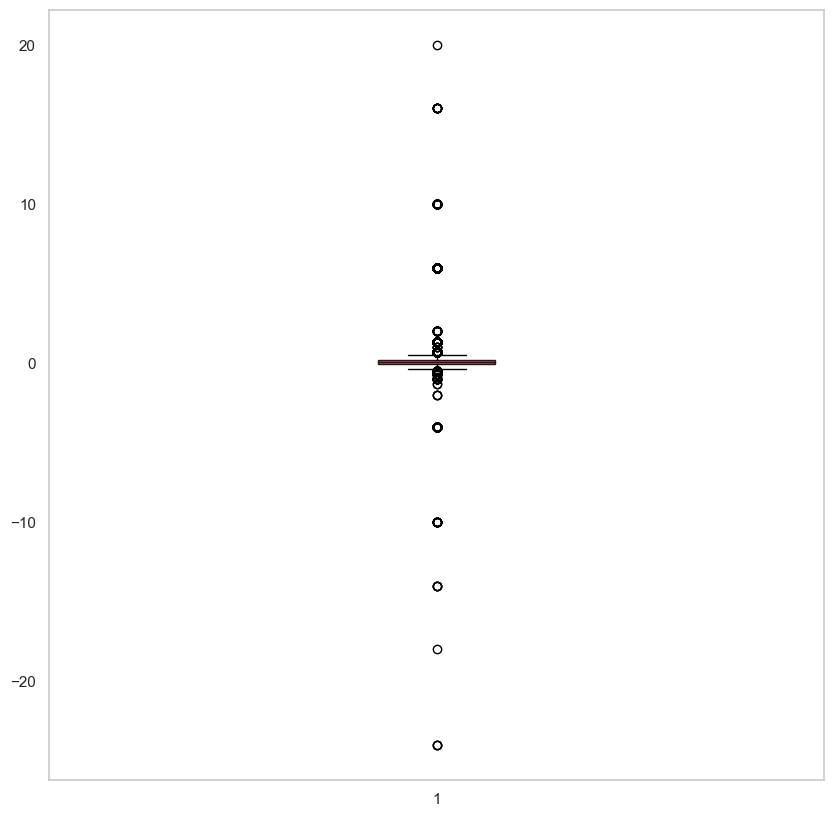

In [9]:
plt.boxplot(
    df_melt['value'],
    patch_artist=True, 
    boxprops=dict(facecolor="r", color="k"),
    medianprops=dict(color='k')
    )